In [57]:
import os 
import cv2 as cv


time_step = 5

data_dir = "sample"
img_format = '.png'


data_X = []
data_y = []

for i in os.listdir(data_dir):
    for j in os.listdir(os.path.join(data_dir, i)):
        for k in os.listdir(os.path.join(data_dir, i,j)):
            dir = os.path.join(data_dir, i,j,k)
            if (dir.endswith(img_format)):
                num = int((dir.split('\\')[-1]).split('.')[-2])
                if num >= (time_step-1) :
                    images =[]
                    for c in range(num-time_step+1, num+1):
                        img = os.path.join(data_dir, i,j,str(c)+img_format)
                        img = cv.imread(img)
                        images.append(img)
                        
                    data_X.append(images)
                    data_y.append(i)


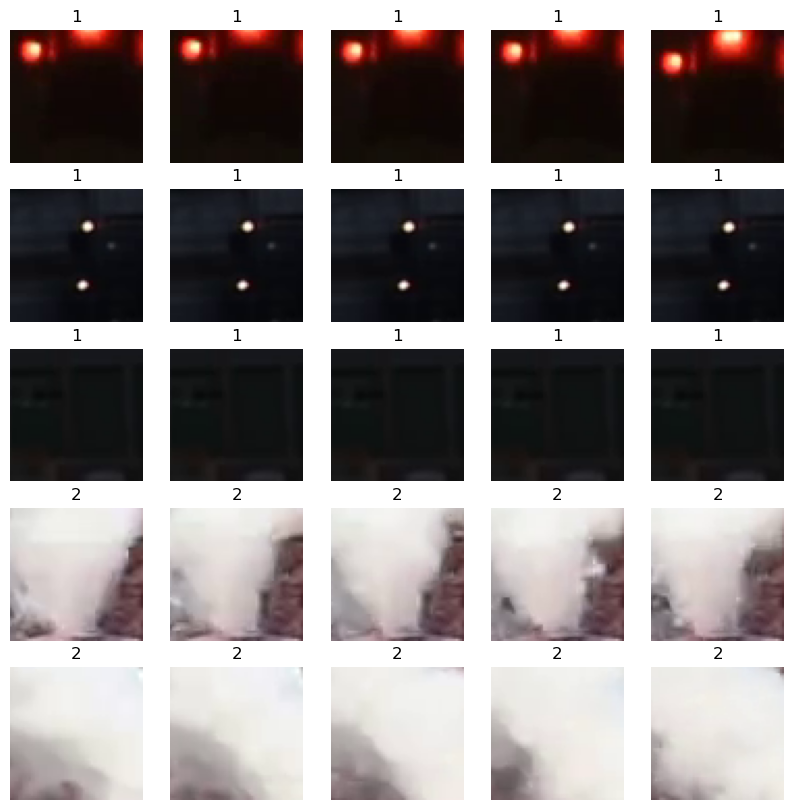

In [66]:
import numpy as np
data_X = np.array(data_X)


import matplotlib.pyplot as plt

idx_coef = 19

plt.figure(figsize=(10, 10))
for i in range(time_step):
    idx = idx_coef *i
    for j in range(time_step):
        plt.subplot(time_step, time_step, time_step*i + j+1)
        plt.imshow(cv.cvtColor(data_X[idx][j],cv.COLOR_BGR2RGB))
        plt.title(data_y[idx])
        plt.axis("off")
